## Importing libraries

In [110]:
import pandas as pd

In [111]:
import matplotlib.pyplot as plt

In [112]:
import seaborn as sns

In [113]:
import numpy as np

## Exploring Dataset

In [114]:
df = pd.read_csv('Food data.csv')

In [115]:
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


## Checking for inconsistencies

In [117]:
df.isnull().sum()

,0
ID,0
date,0
meals_served,32
kitchen_staff,18
temperature_C,0
humidity_percent,16
day_of_week,0
special_event,0
past_waste_kg,16
staff_experience,337


\

## Getting rid of duplicates

In [118]:
df.duplicated().sum()

np.int64(0)

In [119]:
df.drop(columns=['ID'],inplace=True)

In [120]:
df.duplicated().sum()

np.int64(768)

In [121]:
df = df.drop_duplicates()

In [122]:
df.shape

(1054, 10)

## Correcting


In [123]:
df['staff_experience'].value_counts()

,count
staff_experience,
Beginner,214
intermediate,207
EXPERT,207
Intermediate,205
Pro,23


In [124]:
df['waste_category'].value_counts()

,count
waste_category,
MEAT,229
GRAINS,214
dairy,191
Vegetables,190
MeAt,180
Barley,15
Wheat,14


## correcting spelling mistakes

In [125]:
df['staff_experience'] = df['staff_experience'].str.strip().str.lower()

In [126]:
df.loc[:, 'staff_experience'] = df['staff_experience'].str.strip().str.lower()

In [127]:
df.loc[:, 'waste_category'] = df['waste_category'].str.strip().str.lower()

In [128]:
df['staff_experience'].value_counts()

,count
staff_experience,
intermediate,412
beginner,214
expert,207
pro,23


In [129]:
df['waste_category'].value_counts()

,count
waste_category,
meat,409
grains,214
dairy,191
vegetables,190
barley,15
wheat,14


## Handling missing values



In [130]:
df.isnull().sum()

,0
date,0
meals_served,32
kitchen_staff,18
temperature_C,0
humidity_percent,16
day_of_week,0
special_event,0
past_waste_kg,16
staff_experience,198
waste_category,21


<Axes: >

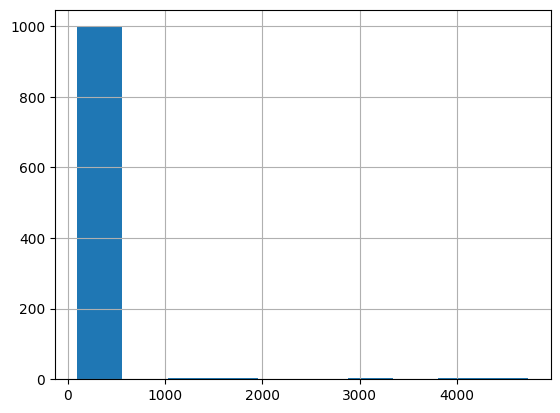

In [131]:
df['meals_served'].hist()

### Continous data is skewed so towards left so obivious choice to fill missing data is median

In [132]:
df['meals_served'].fillna(df['meals_served'].median(),inplace=True)

<ipython-input-132-ad6ff983c0cf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['meals_served'].fillna(df['meals_served'].median(),inplace=True)


In [133]:
df.loc[:, 'meals_served'] = df['meals_served'].fillna(df['meals_served'].median())

In [134]:
df.isnull().sum()

,0
date,0
meals_served,0
kitchen_staff,18
temperature_C,0
humidity_percent,16
day_of_week,0
special_event,0
past_waste_kg,16
staff_experience,198
waste_category,21


In [135]:
df['kitchen_staff'].value_counts()

,count
kitchen_staff,
12,80
5,77
10,77
13,76
19,73
9,70
15,69
7,68
18,66


In [136]:
df.loc[:,'kitchen_staff'] = df['kitchen_staff'].replace({'ten ': 10, 'eleven': 11})

In [137]:
df['kitchen_staff'].value_counts()

,count
kitchen_staff,
12,80
5,77
10,77
13,76
19,73
9,70
15,69
7,68
18,66


In [138]:
df["kitchen_staff"].median()

np.float64(12.0)

In [139]:
df.loc[:, 'kitchen_staff'] = df['kitchen_staff'].fillna(12).astype(int)

In [190]:
df['special_event'].value_counts()

,count
special_event,
0,956
1,90
One,8


In [201]:
df['special_event'] = df['special_event'].str.strip().replace({'One': 1})

In [202]:
df['special_event'].value_counts()

,count
special_event,
0,956
1,90


In [140]:
df.isnull().sum()

,0
date,0
meals_served,0
kitchen_staff,0
temperature_C,0
humidity_percent,16
day_of_week,0
special_event,0
past_waste_kg,16
staff_experience,198
waste_category,21


In [141]:
df['kitchen_staff'].value_counts()

,count
kitchen_staff,
12,98
10,81
5,77
13,76
19,73
9,70
15,69
7,68
18,66


In [142]:
df['humidity_percent'].value_counts()

,count
humidity_percent,
87.974605,4
54.498381,4
75.789317,4
52.896716,3
70.900169,3
...,...
75.814744,1
32.580417,1
39.768903,1


<Axes: >

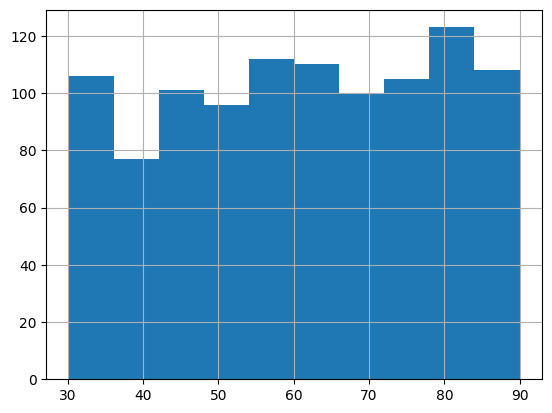

In [143]:
df['humidity_percent'].hist()

In [144]:
df['humidity_percent'].fillna(df['humidity_percent'].mean(),inplace=True)

<ipython-input-144-f329b681eb03>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['humidity_percent'].fillna(df['humidity_percent'].mean(),inplace=True)


<Axes: >

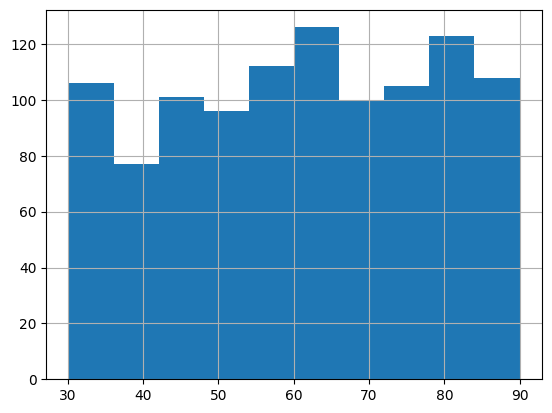

In [145]:
df['humidity_percent'].hist()

<Axes: >

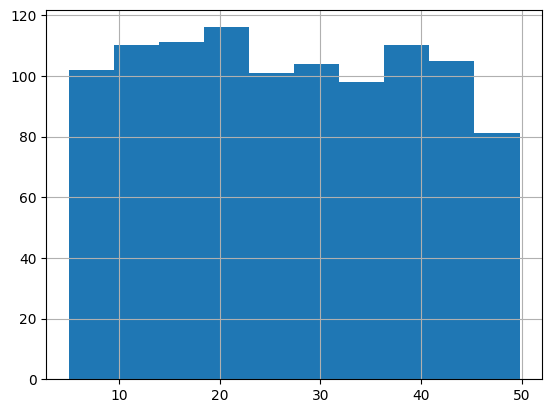

In [146]:
df['past_waste_kg'].hist()

In [147]:
df['past_waste_kg'].fillna(df['past_waste_kg'].median(),inplace=True)

<ipython-input-147-0d12b69cc1fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['past_waste_kg'].fillna(df['past_waste_kg'].median(),inplace=True)


<Axes: >

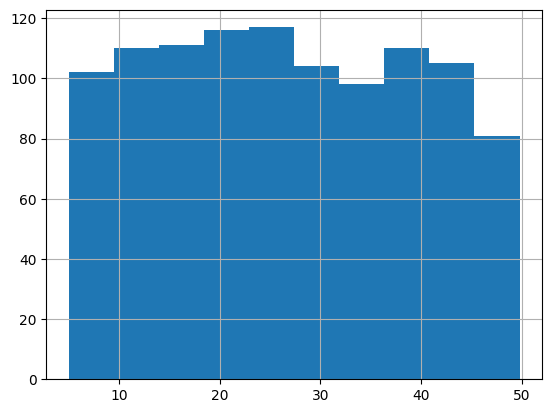

In [148]:
df['past_waste_kg'].hist()

In [149]:
df['staff_experience'].value_counts()

,count
staff_experience,
intermediate,412
beginner,214
expert,207
pro,23


<Axes: >

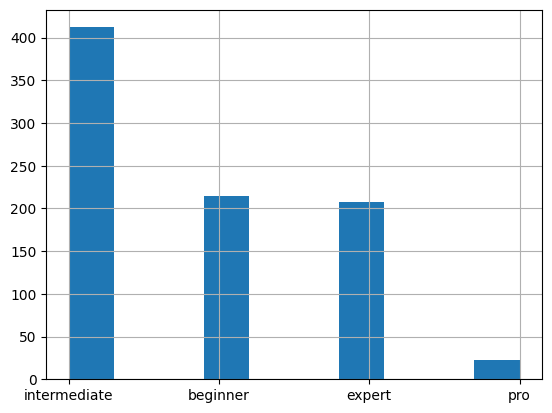

In [150]:
df['staff_experience'].hist()

In [151]:
df['staff_experience'].fillna('intermediate',inplace=True)

<ipython-input-151-857a857d6004>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['staff_experience'].fillna('intermediate',inplace=True)


<Axes: >

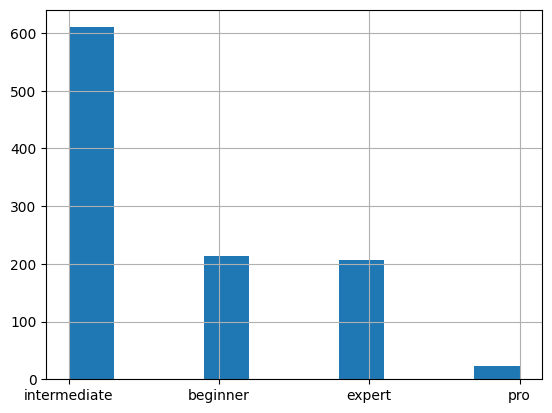

In [152]:
df['staff_experience'].hist()

In [153]:
df.isnull().sum()

,0
date,0
meals_served,0
kitchen_staff,0
temperature_C,0
humidity_percent,0
day_of_week,0
special_event,0
past_waste_kg,0
staff_experience,0
waste_category,21


In [154]:
df['waste_category'].value_counts()

,count
waste_category,
meat,409
grains,214
dairy,191
vegetables,190
barley,15
wheat,14


<Axes: >

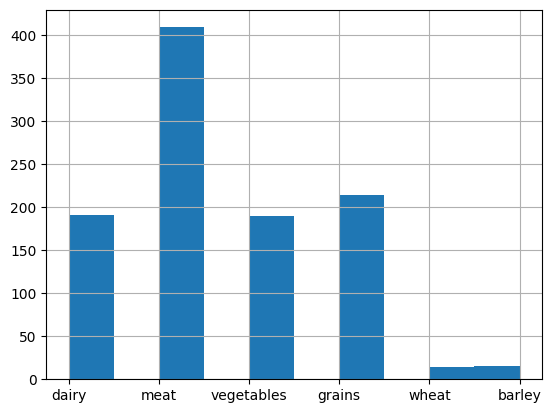

In [155]:
df['waste_category'].hist()

In [156]:
df['waste_category'].fillna('meat',inplace=True)

<ipython-input-156-4d6a0fb8a6d6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['waste_category'].fillna('meat',inplace=True)


<Axes: >

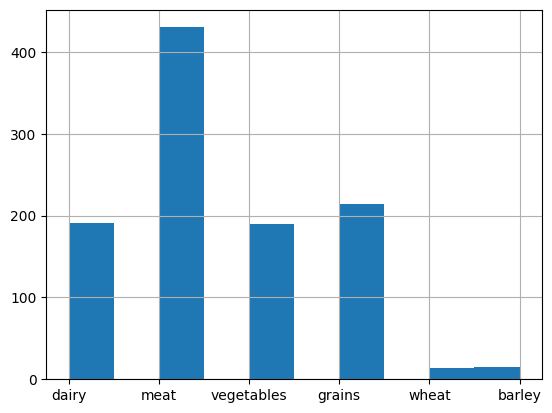

In [157]:
df['waste_category'].hist()

In [158]:
df.isnull().sum()

,0
date,0
meals_served,0
kitchen_staff,0
temperature_C,0
humidity_percent,0
day_of_week,0
special_event,0
past_waste_kg,0
staff_experience,0
waste_category,0


## dealt with naull values

# outliers


In [159]:
df.head()

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,intermediate,meat
2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,beginner,meat
3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,beginner,meat
4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,intermediate,meat


In [160]:
Q1 = df['temperature_C'].quantile(0.25)
Q3 = df['temperature_C'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['temperature_C'] < lower_bound) | (df['temperature_C'] > upper_bound)

print(outliers)

0       False
1       False
2       False
3       False
4       False
        ...  
1783    False
1788    False
1792    False
1793    False
1815    False
Name: temperature_C, Length: 1054, dtype: bool


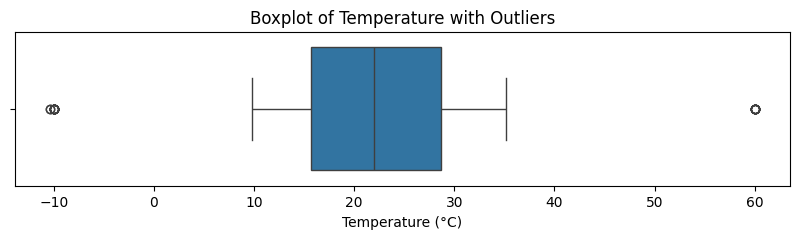

In [161]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['temperature_C'], showfliers=True)
plt.title('Boxplot of Temperature with Outliers')
plt.xlabel('Temperature (°C)')
plt.show()

In [162]:
for x, is_outlier in outlier.items():
    if is_outlier:
        print(df.loc[x, 'temperature_C'])

-10.37220651
-10.0
-10.0
60.0
60.0
-10.0
-10.0
60.0
60.0
-10.0
-10.0
-10.0
-10.0
60.0
60.0
60.0
-10.0
-10.0
60.0
-10.0
60.0
-10.0
-10.37220651
-10.0
-10.0
60.0


In [163]:
for x in df['temperature_C']:
    if x < 0:
      print(x)

-10.37220651
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.37220651
-10.0
-10.0


In [164]:
sub_df = df[['temperature_C', 'date']].copy()

In [165]:
sub_df.head()

,temperature_C,date
0,27.887273,12/19/2022
1,10.317872,11/21/2023
2,27.714300,2/1/2022
3,19.173902,3/19/2023
4,26.375233,7/18/2022


In [166]:
cold_days = sub_df[sub_df['temperature_C'] < 0]
print(cold_days)

      temperature_C       date
12       -10.372207  1/25/2022
102      -10.000000  2/24/2024
238      -10.000000   3/6/2023
345      -10.000000   2/1/2024
384      -10.000000  3/15/2022
407      -10.000000  1/25/2022
445      -10.000000  1/29/2023
463      -10.000000  7/30/2023
492      -10.000000   4/4/2022
701      -10.000000  9/25/2022
710      -10.000000   1/9/2023
768      -10.000000   5/7/2024
852      -10.000000  7/20/2024
923      -10.372207  1/25/2022
1318     -10.000000  1/25/2022
1612     -10.000000  9/25/2022


since temperature and dates are not making any sense togather so i am making a new column seasons !! to work with


In [167]:
df['date'] = pd.to_datetime(df['date'])

In [168]:
df['month'] = df['date'].dt.month

## Creating seasons


In [169]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

In [170]:
df.head()

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,month,season
0,2022-12-19,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,12,Winter
1,2023-11-21,244.0,15,10.317872,64.430475,1,0,42.311779,intermediate,meat,11,Autumn
2,2022-02-01,148.0,16,27.714300,69.046113,1,0,41.184305,beginner,meat,2,Winter
3,2023-03-19,157.0,19,19.173902,46.292823,6,0,41.543492,beginner,meat,3,Spring
4,2022-07-18,297.0,10,26.375233,79.741064,0,0,26.525097,intermediate,meat,7,Summer


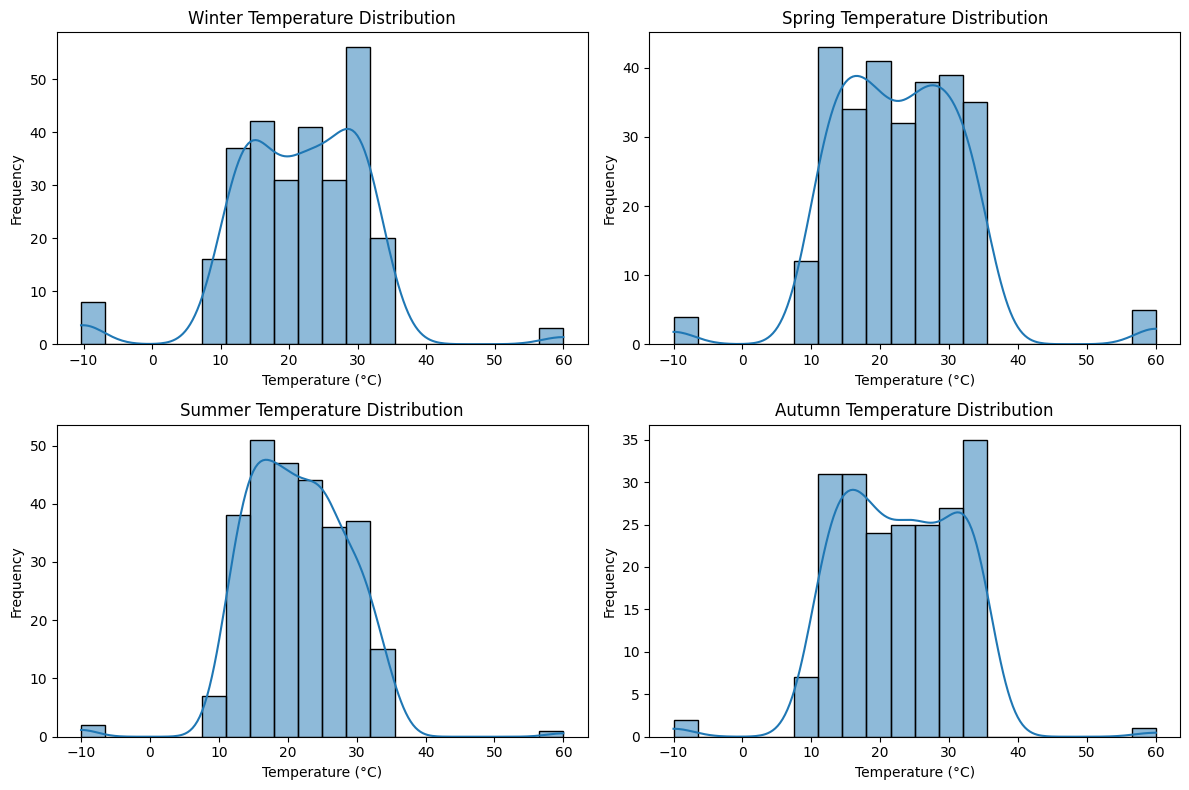

In [171]:
# Plot histograms separately for each season
plt.figure(figsize=(12, 8))

# Winter
plt.subplot(2, 2, 1)
sns.histplot(df[df['season'] == 'Winter']['temperature_C'], bins=20, kde=True)
plt.title('Winter Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Spring
plt.subplot(2, 2, 2)
sns.histplot(df[df['season'] == 'Spring']['temperature_C'], bins=20, kde=True)
plt.title('Spring Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Summer
plt.subplot(2, 2, 3)
sns.histplot(df[df['season'] == 'Summer']['temperature_C'], bins=20, kde=True)
plt.title('Summer Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Autumn
plt.subplot(2, 2, 4)
sns.histplot(df[df['season'] == 'Autumn']['temperature_C'], bins=20, kde=True)
plt.title('Autumn Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: >

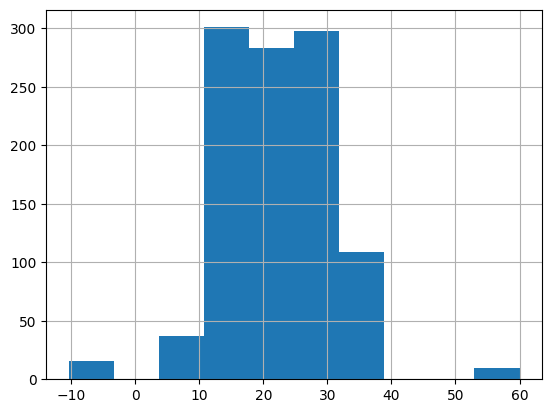

In [172]:
df['temperature_C'].hist()

In [173]:
for x in df['temperature_C']:
    if x > 48 or x < -3:
      print(x)

-10.37220651
-10.0
-10.0
60.0
60.0
-10.0
-10.0
60.0
60.0
-10.0
-10.0
-10.0
-10.0
60.0
60.0
60.0
-10.0
-10.0
60.0
-10.0
60.0
-10.0
-10.37220651
-10.0
-10.0
60.0


## caping

In [174]:
df['temperature_C'] = np.clip(df['temperature_C'], a_min= -3, a_max=48)

<Axes: >

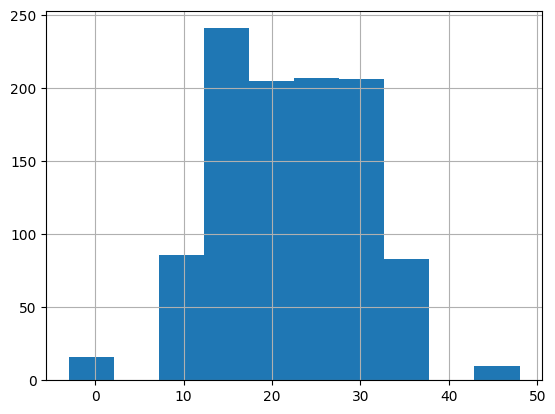

In [175]:
df['temperature_C'].hist()

In [176]:
df.head()

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,month,season
0,2022-12-19,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,12,Winter
1,2023-11-21,244.0,15,10.317872,64.430475,1,0,42.311779,intermediate,meat,11,Autumn
2,2022-02-01,148.0,16,27.714300,69.046113,1,0,41.184305,beginner,meat,2,Winter
3,2023-03-19,157.0,19,19.173902,46.292823,6,0,41.543492,beginner,meat,3,Spring
4,2022-07-18,297.0,10,26.375233,79.741064,0,0,26.525097,intermediate,meat,7,Summer


<Axes: >

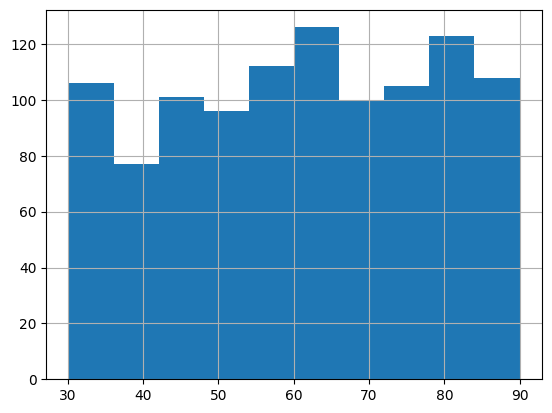

In [177]:
df['humidity_percent'].hist()

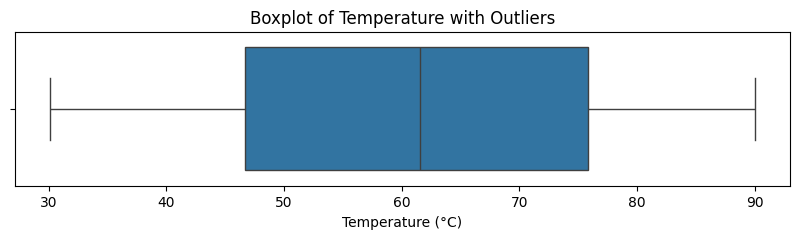

In [180]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['humidity_percent'], showfliers=True)
plt.title('Boxplot of Temperature with Outliers')
plt.xlabel('Temperature (°C)')
plt.show()

In [181]:
df.columns

Index(['date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category', 'month', 'season'],
      dtype='object')

## Making a copy of data set that is sorted according to date !

In [213]:
df_sorted = df.sort_values('date').copy()

# Analysis

<Axes: xlabel='date'>

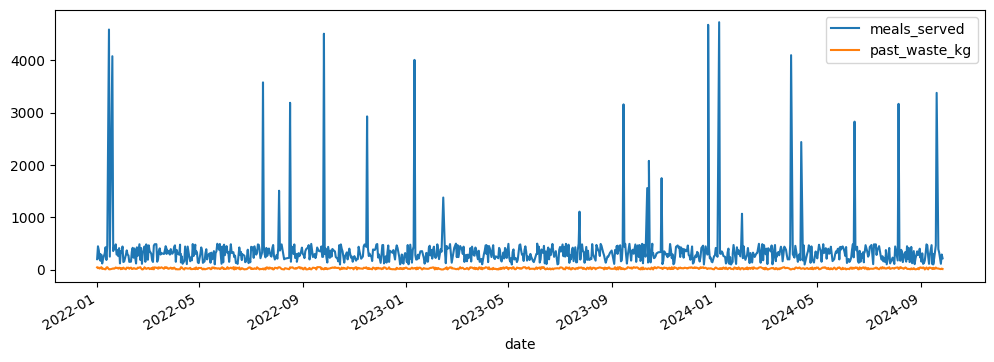

In [214]:
df_sorted.set_index('date')[['meals_served','past_waste_kg']].plot(figsize=(12,4))

In [215]:
# Create a new column for change in meals served
df_sorted['meals_diff'] = df_sorted['meals_served'].diff()

# View rows where the change is significantly high (e.g., > 100)
spike_days = df_sorted[df_sorted['meals_diff'] > 100]  # adjust threshold as needed

# Show date and spike info
print(spike_days[['date', 'meals_served', 'meals_diff']])

          date  meals_served  meals_diff
171 2022-01-02         448.0       246.0
314 2022-01-06         288.0       117.0
155 2022-01-10         314.0       112.0
60  2022-01-11         430.0       116.0
179 2022-01-13         472.0       285.0
..         ...           ...         ...
415 2024-09-16         210.0       108.0
457 2024-09-17         337.0       127.0
275 2024-09-18         462.0       125.0
642 2024-09-19        3380.0      2918.0
538 2024-09-25         291.0       177.0

[257 rows x 3 columns]


In [218]:
pd.set_option('display.max_rows', None)
print(spike_days[['date', 'meals_served', 'meals_diff']])

           date  meals_served  meals_diff
171  2022-01-02         448.0       246.0
314  2022-01-06         288.0       117.0
155  2022-01-10         314.0       112.0
60   2022-01-11         430.0       116.0
179  2022-01-13         472.0       285.0
714  2022-01-15        4590.0      4118.0
425  2022-01-19        4080.0      3829.0
591  2022-01-27         413.0       153.0
370  2022-01-29         352.0       231.0
88   2022-01-31         444.0       109.0
855  2022-02-04         287.0       129.0
398  2022-02-11         343.0       189.0
165  2022-02-14         406.0       176.0
1304 2022-02-17         428.0       308.0
53   2022-02-19         373.0       107.0
536  2022-02-20         487.0       114.0
822  2022-02-22         415.0       227.0
91   2022-02-24         341.0       228.0
112  2022-02-28         485.0       333.0
432  2022-03-03         466.0       275.0
1036 2022-03-09         459.0       310.0
384  2022-03-15         359.0       154.0
906  2022-03-29         395.0     

## Insight

# Huge spikes (meals > 3000) appear on:

2022-01-15 and 2022-01-19

2022-07-16, 2022-08-17, 2022-09-26, 2022-12-24

2023-01-11, 2023-12-24, etc.

# Year-end holiday:

Dec 24 appears as a massive spike—likely Christmas Eve service, even if you’re not “celebrating” Christmas, many institutions run special buffet days or brunches.

# Mid-January:

Spikes on Jan 15 and Jan 19 may align with semester breaks, orientation weeks, or large training events starting after the New Year.

# Summer peaks:

Mid-July (July 16) and mid-August (Aug 17) spikes—could be summer camps, special programs, or Ramadan-related iftar buffets (Ramadan in 2022 was Apr 2–May 1; Eid al-Adha fell July 10–July 15).

## Which category is stable season wise or through out the year .


In [219]:
pivot_table = df.pivot_table(
    index='waste_category',
    columns='season',
    values='past_waste_kg',
    aggfunc='mean'
).round(2)

print(pivot_table)

season          Autumn  Spring  Summer  Winter
waste_category                                
barley           15.97   33.10   23.63   16.47
dairy            26.95   27.36   27.24   26.62
grains           26.95   25.05   25.44   24.93
meat             25.95   26.21   27.87   28.25
vegetables       32.13   26.81   27.22   27.40
wheat            25.59   15.86   24.12   17.81


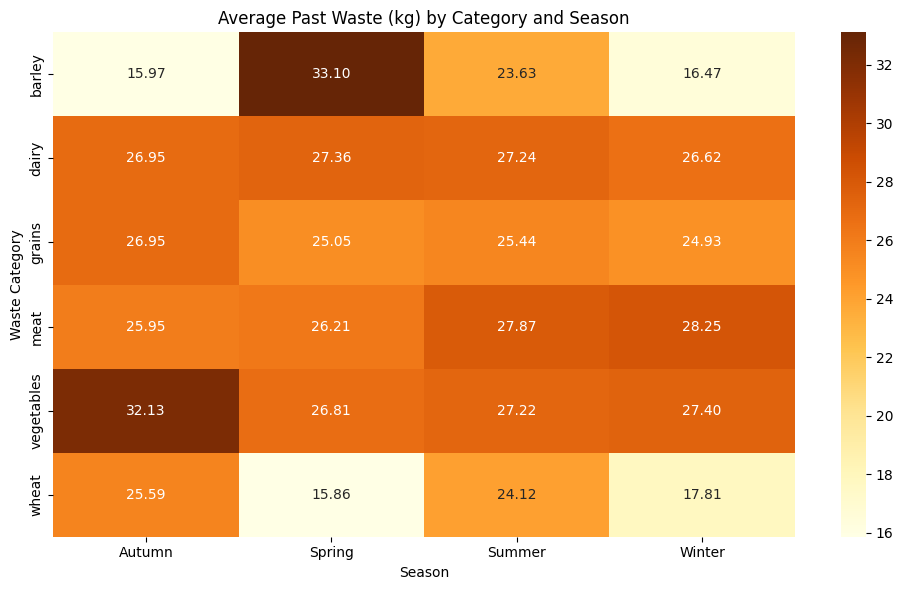

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlOrBr")
plt.title('Average Past Waste (kg) by Category and Season')
plt.xlabel('Season')
plt.ylabel('Waste Category')
plt.tight_layout()
plt.show()

# Insights

Highest Waste per Category:
Barley peaks in Spring (33.10 kg)

Dairy stays fairly stable across all seasons

Meat has the highest waste in Winter (28.25 kg)

Vegetables waste the most in Autumn

Wheat waste is lowest in Spring (15.86 kg) and Autumn (25.59 kg)

Categories with Strong Seasonal Swings:
Barley: from 15.97 (Autumn) to 33.10 (Spring) — significant spike

Wheat: from 15.86 (Spring) to 25.59 (Autumn)

Vegetables: Autumn is a peak (32.13 kg), other seasons are lower

## Recommendations :
 - Barley--Spring waste is highest (33.10 kg) ( Overstocking issue )
   Reduce stock in Spring
 - Dairy--Fairly consistent waste across all seasons (≈27 kg)
 Maintain steady inventory year-round,Monitor for spoilage-prone batches rather than adjusting seasonal quantity.
 - Grains--Maintain slightly reduced inventory in Spring/Winter
 - Meat--Highest waste in Winter (28.25 kg) Avoid overstocking meat in WinterTrack customer demand trends in Winter (may be lower than expected)
 - Vegetables--Highest waste in Autumn (32.13 kg) Reduce vegetable stock in Autumn
 - Wheat-- High waste in Autumn (25.59 kg) and Summer (24.12 kg) Lowest in Spring (15.86 kg) Stock less wheat in Autumn, Avoid excess ordering in Summer, Align stock with actual sales trends





In [222]:
df.columns

Index(['date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category', 'month', 'season',
       'staff_experience_encoded'],
      dtype='object')

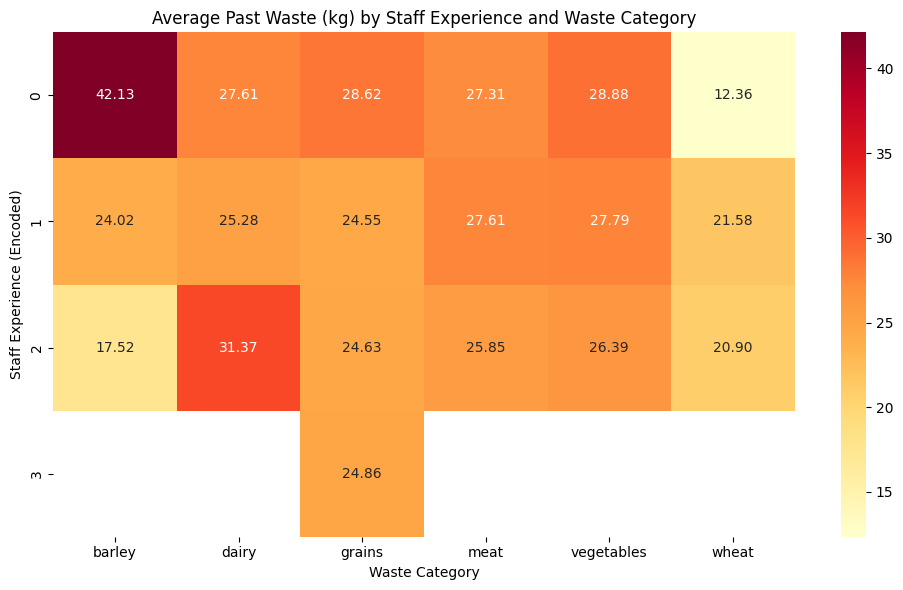

In [223]:
pivot = df.pivot_table(values='past_waste_kg',
                       index='staff_experience_encoded',
                       columns='waste_category',
                       aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Past Waste (kg) by Staff Experience and Waste Category')
plt.xlabel('Waste Category')
plt.ylabel('Staff Experience (Encoded)')
plt.tight_layout()
plt.show()

# Insights

- Barley Waste dramatically decreases with more experienced staff:
From 42.13 kg (new staff) → 17.52 kg (experienced).
Suggests poor handling/prep of barley by new staff.

- Dairy Waste increases with experience:
Could be linked to prep-heavy menus used by experienced chefs (e.g., more dairy dishes or complex recipes).
Might be a menu planning issue, not staff skill.

- Grains and Meat Waste remain somewhat consistent across experience levels:
Training may not strongly influence these — may be storage or portion control related.

- Vegetables Waste gradually reduces with experience:
Indicates that knife skills, storage, or portioning improve with experience.

- Wheat Waste increases from staff level 0 → 1 → 2:
Possibly due to increasing use of wheat in more complex dishes by mid/high-level staff.

## Recommendations:
Train Beginner-Level Staff on Barley Handling
Barley waste drops dramatically from 42.1 kg (Beginner) to 17.5 kg (Expert).

This suggests a steep learning curve for new staff.

Action Points:

Provide hands-on training in barley preparation.

Standardize measurement techniques.

Improve storage practices to reduce spoilage and overuse.

Audit Dairy-Intensive Dishes Prepared by Expert and Professional Staff
Dairy waste increases with experience, peaking at the Expert level.

This may be due to complex, dairy-heavy recipes being handled by more experienced staff.

Action Points:

Review and simplify high-waste recipes.

Apply stricter portion control.

Track which dairy items are frequently discarded.

Create Waste-Specific SOPs for Grains, Vegetables, and Wheat
Waste remains moderately high across all experience levels, showing room for improvement.

Action Points:

Develop Standard Operating Procedures tailored to each ingredient.

Reinforce proper storage, handling, and preparation techniques for each category.

Optimize Vegetable Handling in Beginner Onboarding
Vegetable waste shows a steady decline with experience, highlighting training effectiveness.

Action Points:

Emphasize trimming techniques and storage protocols during onboarding.

Offer refresher courses on knife skills and prep efficiency.

Investigate High Wheat Waste Among Intermediate and Expert Staff
Wheat waste increases from Beginner (12.36 kg) to Intermediate (21.58 kg) and Expert (20.90 kg).

This may point to issues with more complex wheat-based dishes.

Action Points:

Reassess recipes using wheat (e.g., bread, dough).

Identify if spoilage or over-preparation is contributing to the waste.



waste_category               barley      dairy     grains       meat  \
staff_experience_encoded                                               
0                         42.134512  27.612251  28.618882  27.314913   
1                         24.020584  25.275531  24.546479  27.608322   
2                         17.516166  31.372146  24.630135  25.846225   
3                               NaN        NaN  24.859473        NaN   

waste_category            vegetables      wheat  
staff_experience_encoded                         
0                          28.879888  12.356152  
1                          27.785604  21.581862  
2                          26.389926  20.898814  
3                                NaN        NaN  


temperature_C           humidity_percent           
                mean       std             mean        std
season                                                    
Autumn     22.756181  8.204583        62.398632  17.004693
Spring     22.490139  8.604777        60.016524  17.452367
Summer     21.453822  6.988001        61.817321  16.243472
Winter     21.576454  8.644180        60.367590  17.934322

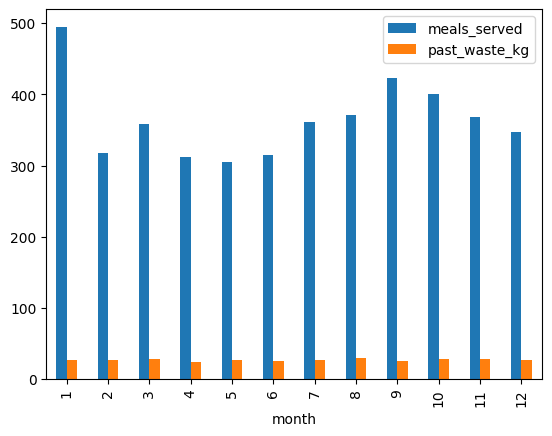

In [221]:
df.groupby('month')[['meals_served','past_waste_kg']].mean().plot(kind='bar')
df.groupby('season')[['temperature_C','humidity_percent']].agg(['mean','std'])

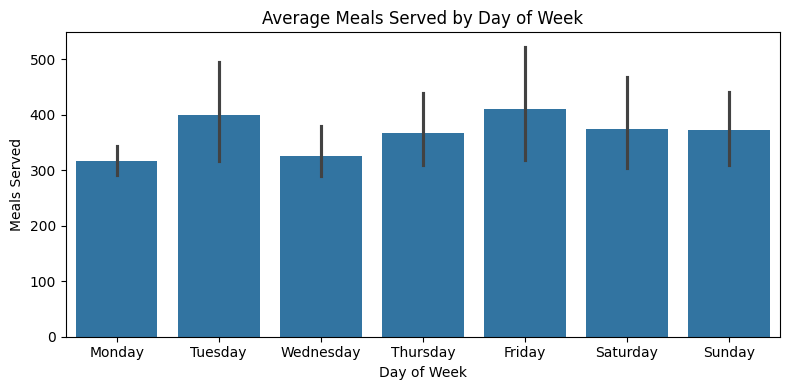

In [186]:
weekday_order = [1, 2, 3, 4, 5, 6, 0]
plt.figure(figsize=(8,4))
sns.barplot(
    x='day_of_week',
    y='meals_served',
    data=df,
    order=weekday_order
)
plt.title('Average Meals Served by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Meals Served')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.show()

In [205]:
df.groupby('special_event')[['meals_served','past_waste_kg']].mean()

,meals_served,past_waste_kg
special_event,,
0,367.148536,26.745097
1,371.427778,27.246551


In [206]:
pd.crosstab(df['waste_category'], df['season'], normalize='columns')

season,Autumn,Spring,Summer,Winter
waste_category,,,,
barley,0.004808,0.010601,0.021583,0.017544
dairy,0.225962,0.148410,0.151079,0.210526
grains,0.197115,0.236749,0.205036,0.171930
meat,0.427885,0.360424,0.417266,0.431579
vegetables,0.134615,0.229682,0.190647,0.154386
wheat,0.009615,0.014134,0.014388,0.014035


DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

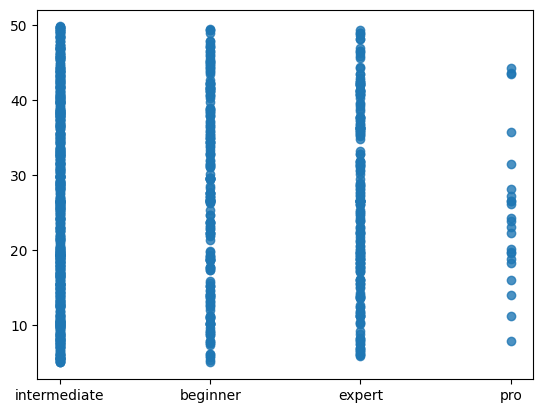

In [207]:
sns.regplot(x='staff_experience', y='past_waste_kg', data=df)

<Axes: xlabel='meals_served', ylabel='past_waste_kg'>

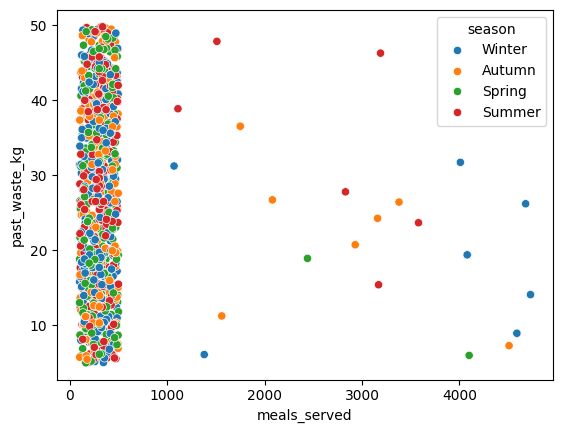

In [208]:
sns.scatterplot(x='meals_served', y='past_waste_kg', hue='season', data=df)

## Ordinal encoding


In [210]:
experience_mapping = {
    'beginner': 0,
    'intermediate': 1,
    'expert': 2,
    'pro': 3
}

df['staff_experience_encoded'] = df['staff_experience'].map(experience_mapping)

In [211]:
df['staff_experience_encoded']

,staff_experience_encoded
0,1
1,1
2,0
3,0
4,1
...,...
1783,1
1788,2
1792,2
1793,1


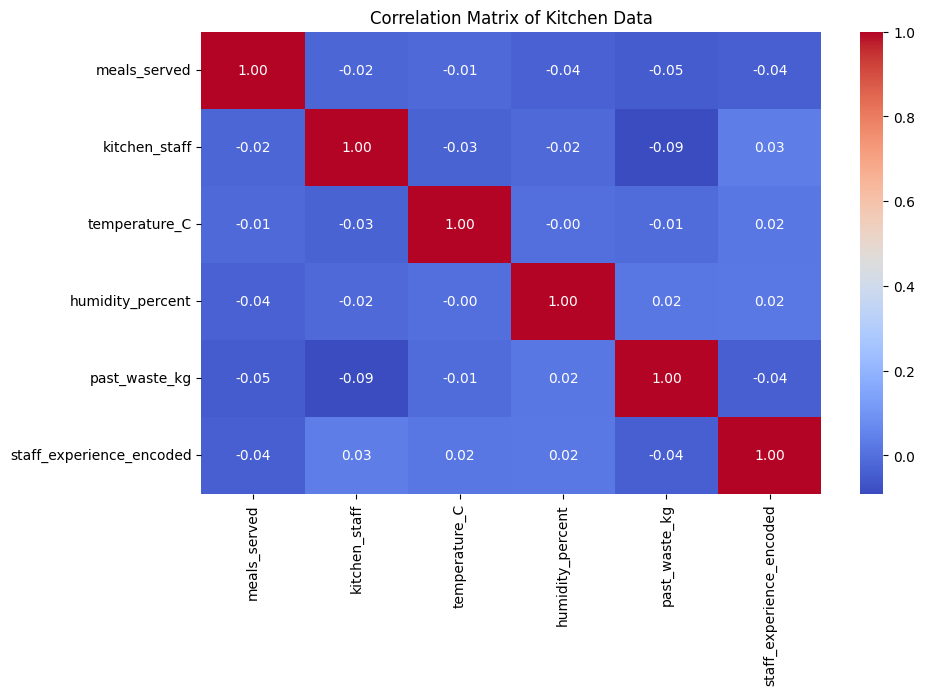

In [212]:
num = [
    'meals_served',
    'kitchen_staff',
    'temperature_C',
    'humidity_percent',
    'past_waste_kg',
    'staff_experience_encoded'  # new ordinal-encoded column
]

# Compute correlation matrix
corr = df[num].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Kitchen Data')
plt.show()

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,month,season,staff_experience_encoded
0,2022-12-19,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,12,Winter,1
1,2023-11-21,244.0,15,10.317872,64.430475,1,0,42.311779,intermediate,meat,11,Autumn,1
2,2022-02-01,148.0,16,27.714300,69.046113,1,0,41.184305,beginner,meat,2,Winter,0
3,2023-03-19,157.0,19,19.173902,46.292823,6,0,41.543492,beginner,meat,3,Spring,0
4,2022-07-18,297.0,10,26.375233,79.741064,0,0,26.525097,intermediate,meat,7,Summer,1
